## 多层感知机的从零开始实现

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
w1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True)*0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
w2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True)*0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
params = [w1, b1, w2, b2]

In [3]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [4]:
def net(X):
    X = X.reshape((-1,num_inputs))
    H = relu(X@w1 + b1)
    return (H@w2 + b2)

In [5]:
loss = nn.CrossEntropyLoss(reduction="none")

In [9]:
num_epochs, lr = 10,0.1
updater = torch.optim.SGD(params,lr=lr)

In [10]:
def train_model(net,train_iter,test_iter,loss,num_epochs,updater):
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
        # 在测试集上评估精度
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        
        train_loss, train_acc = train_metrics
        print(f'epoch {epoch + 1}, train loss {train_loss:.4f}, train acc {train_acc:.4f}, test acc {test_acc:.4f}')
train_model(net,train_iter,test_iter,loss,num_epochs,updater)

epoch 1, train loss 0.2780, train acc 0.9001, test acc 0.8720
epoch 2, train loss 0.2751, train acc 0.9011, test acc 0.8721
epoch 3, train loss 0.2717, train acc 0.9014, test acc 0.8752
epoch 4, train loss 0.2710, train acc 0.9026, test acc 0.8741
epoch 5, train loss 0.2667, train acc 0.9049, test acc 0.8708
epoch 6, train loss 0.2648, train acc 0.9045, test acc 0.8717
epoch 7, train loss 0.2614, train acc 0.9060, test acc 0.8659
epoch 8, train loss 0.2593, train acc 0.9062, test acc 0.8755
epoch 9, train loss 0.2565, train acc 0.9075, test acc 0.8650
epoch 10, train loss 0.2540, train acc 0.9080, test acc 0.8815


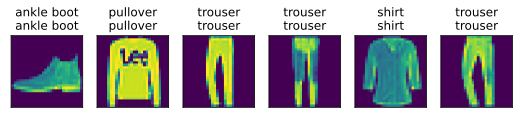

In [11]:
d2l.predict_ch3(net, test_iter)